In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Visualization

Uni-variate Analysis

Plotting distributions of numerical columns

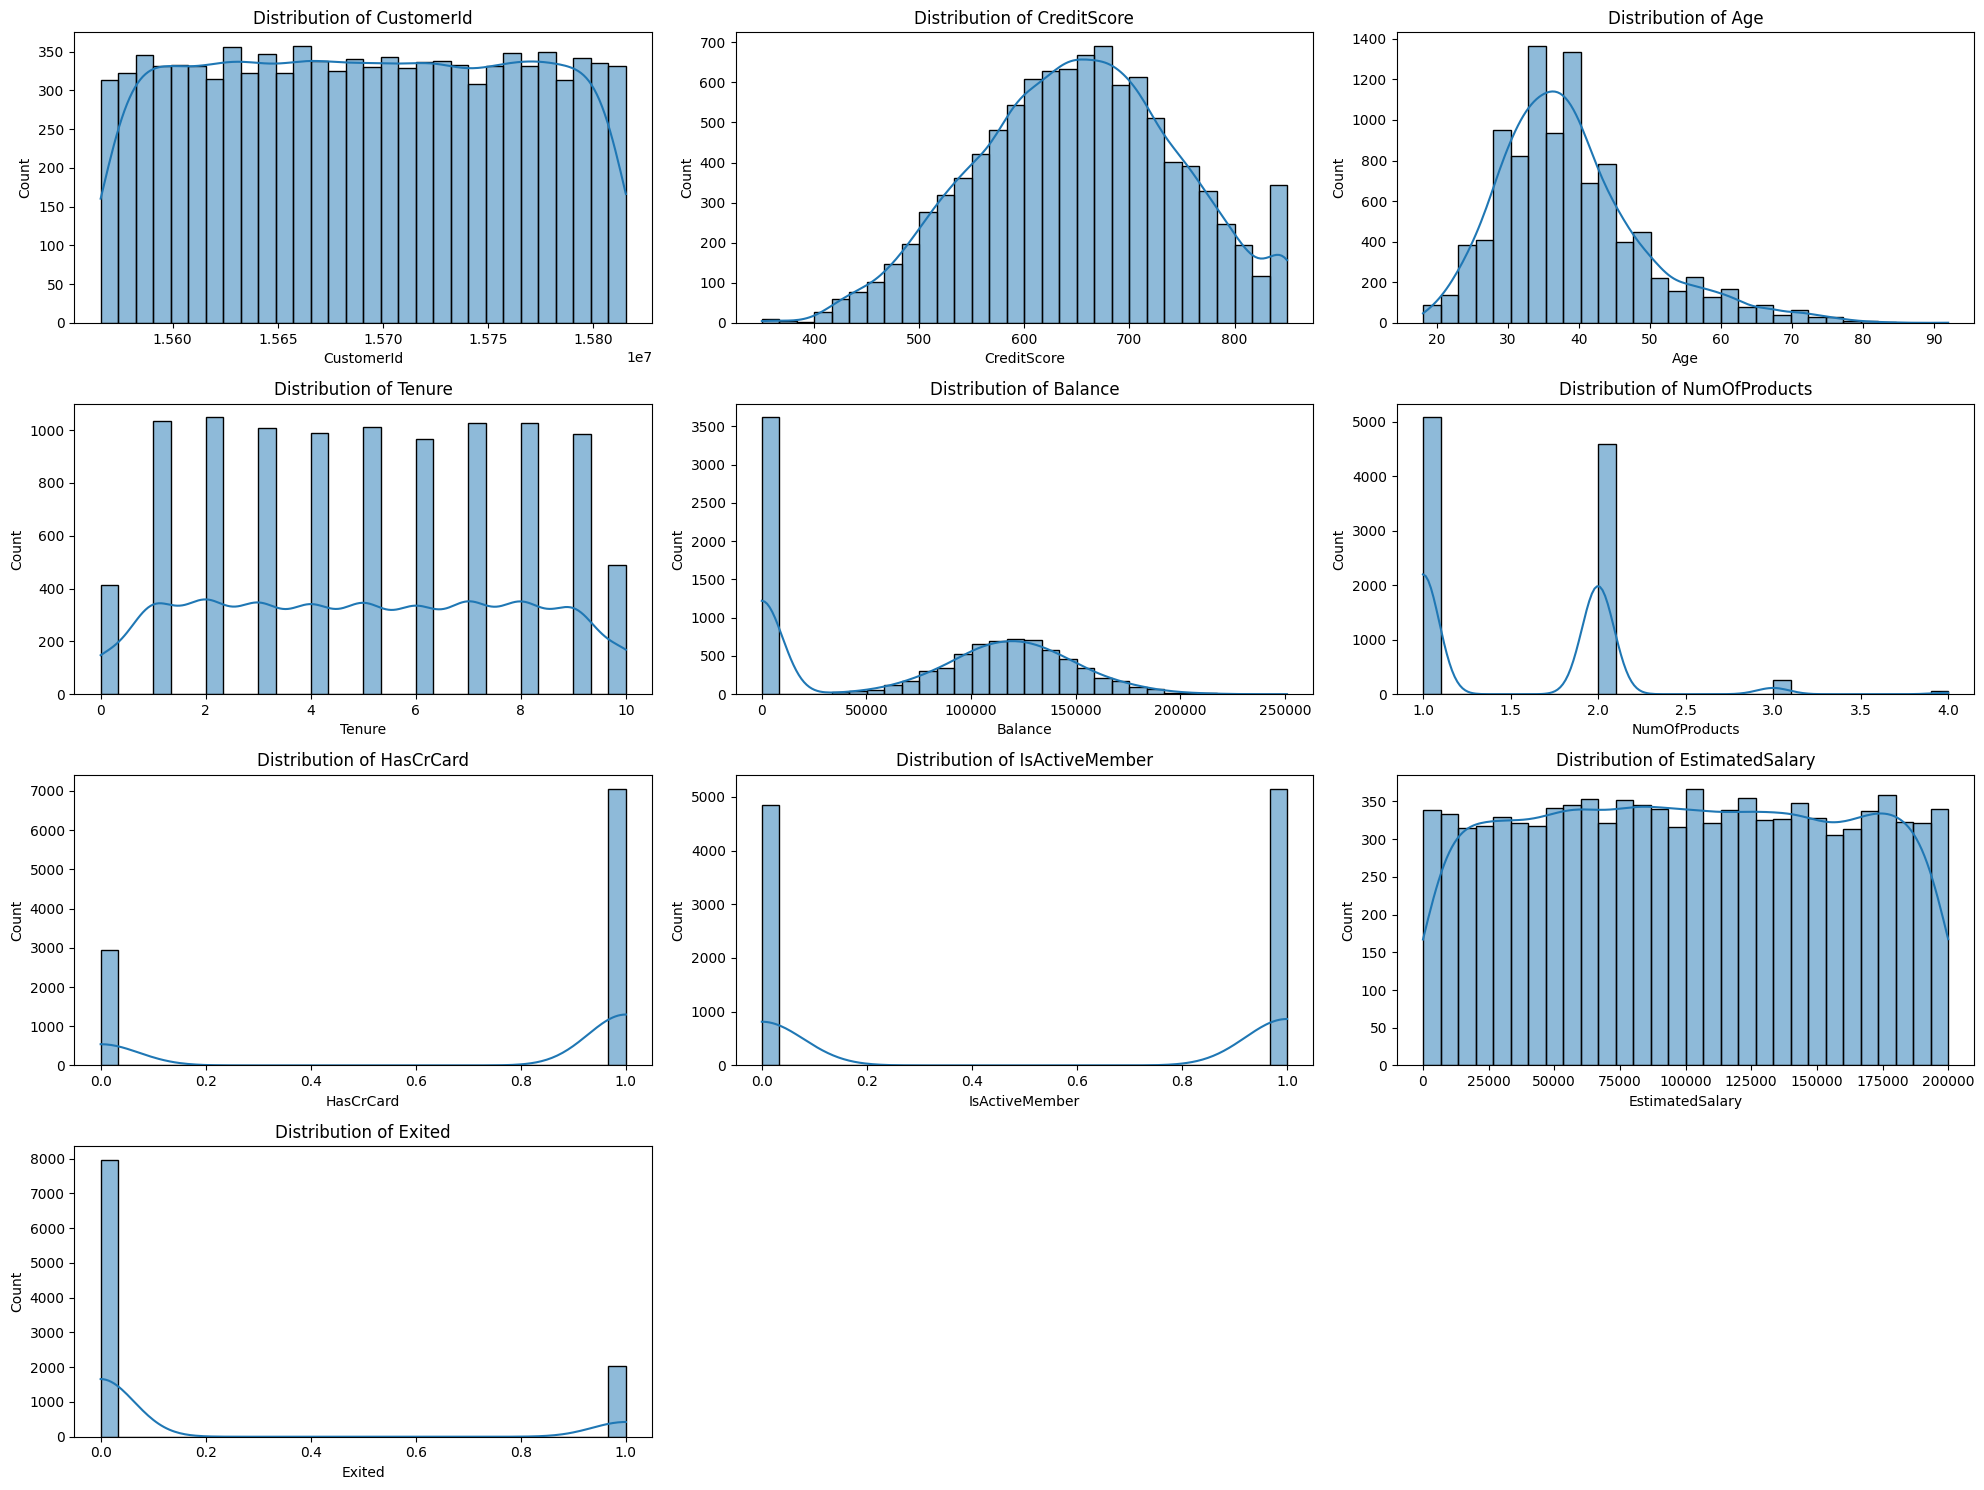

In [3]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns[1:], 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plotting value counts of categorical columns

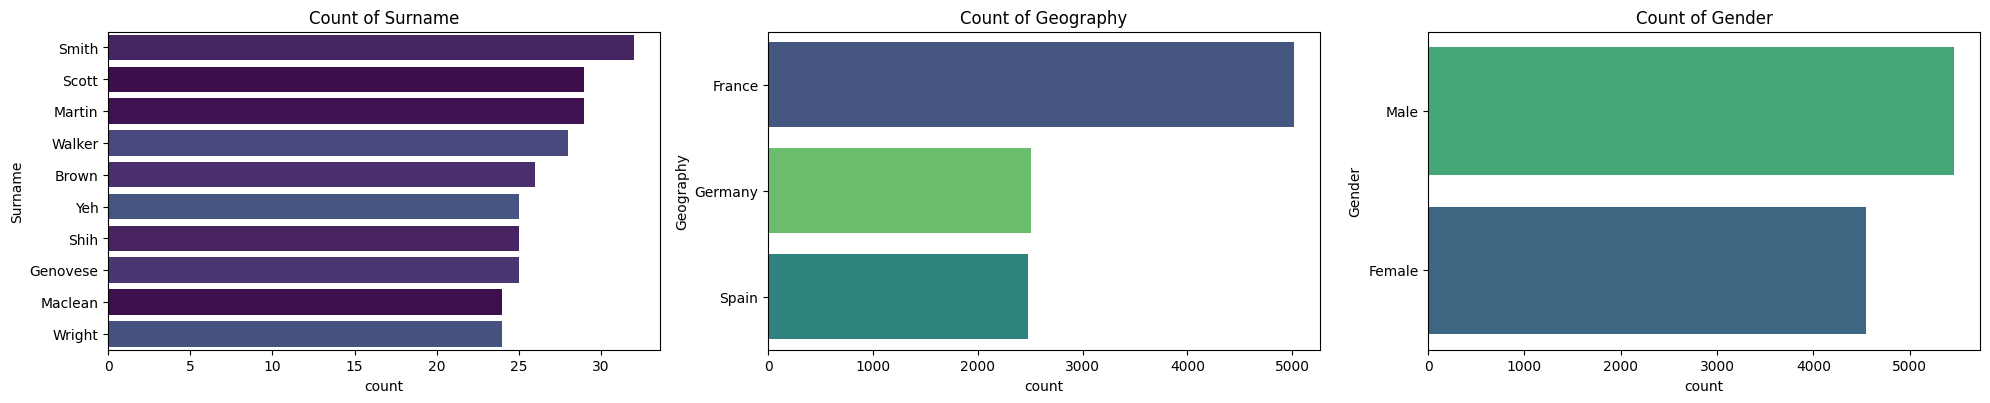

In [4]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
sns.set_palette('Set3')
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values, palette='viridis', hue=df[col], legend=False)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

Bivariate Analysis

Numerical columns against target variable

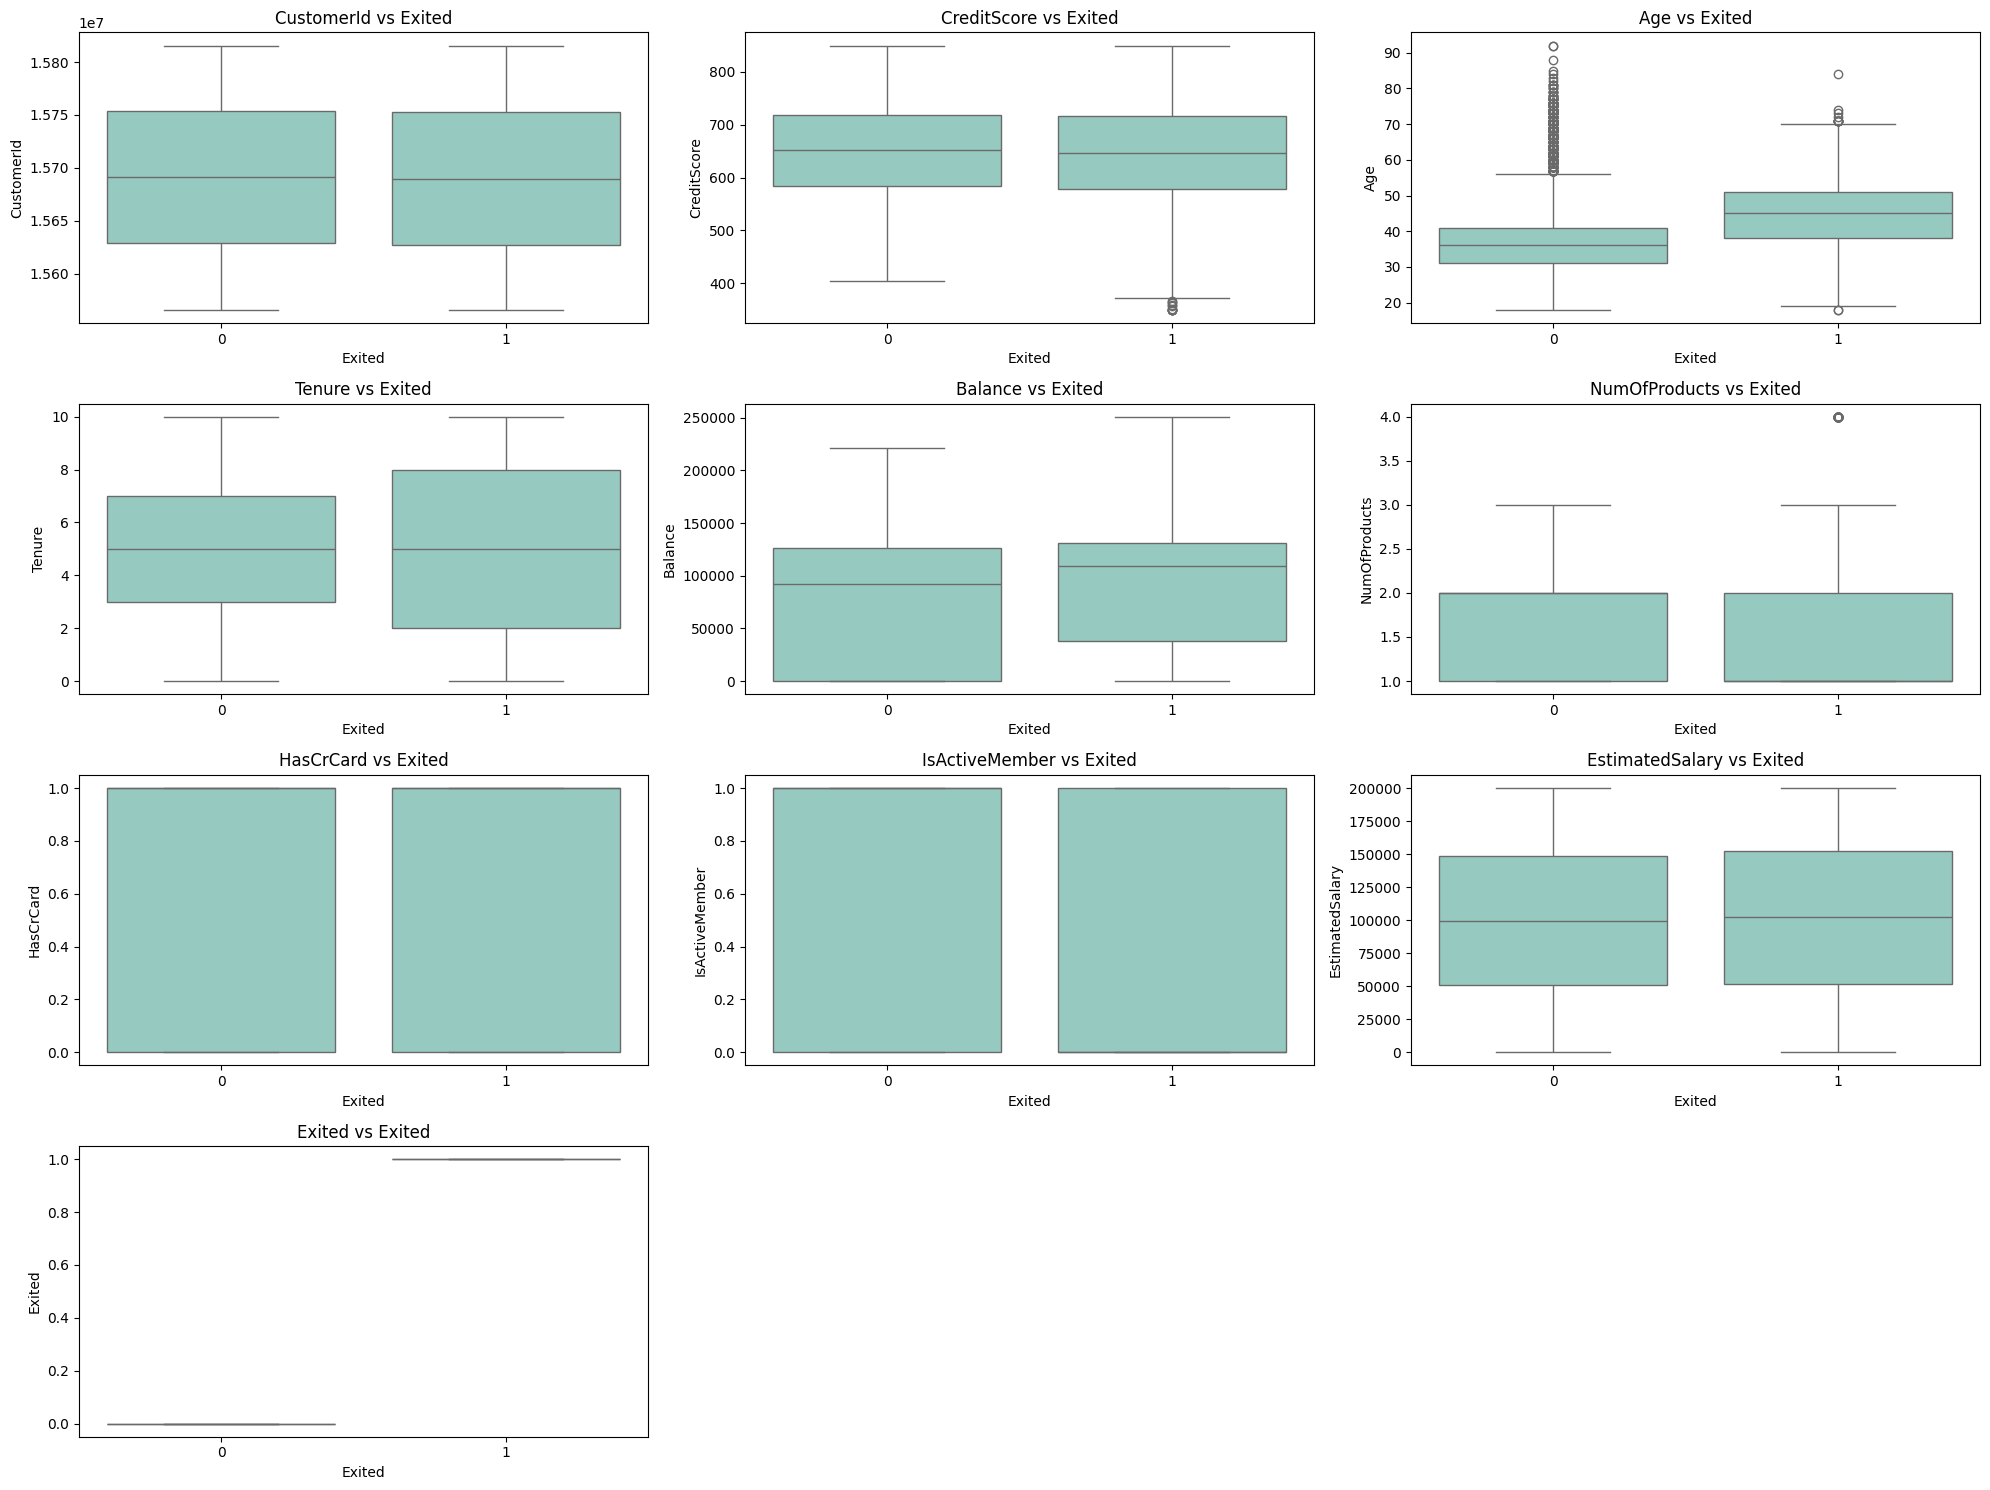

In [5]:
target = 'Exited'

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns[1:], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()


Categorical columns against target variable

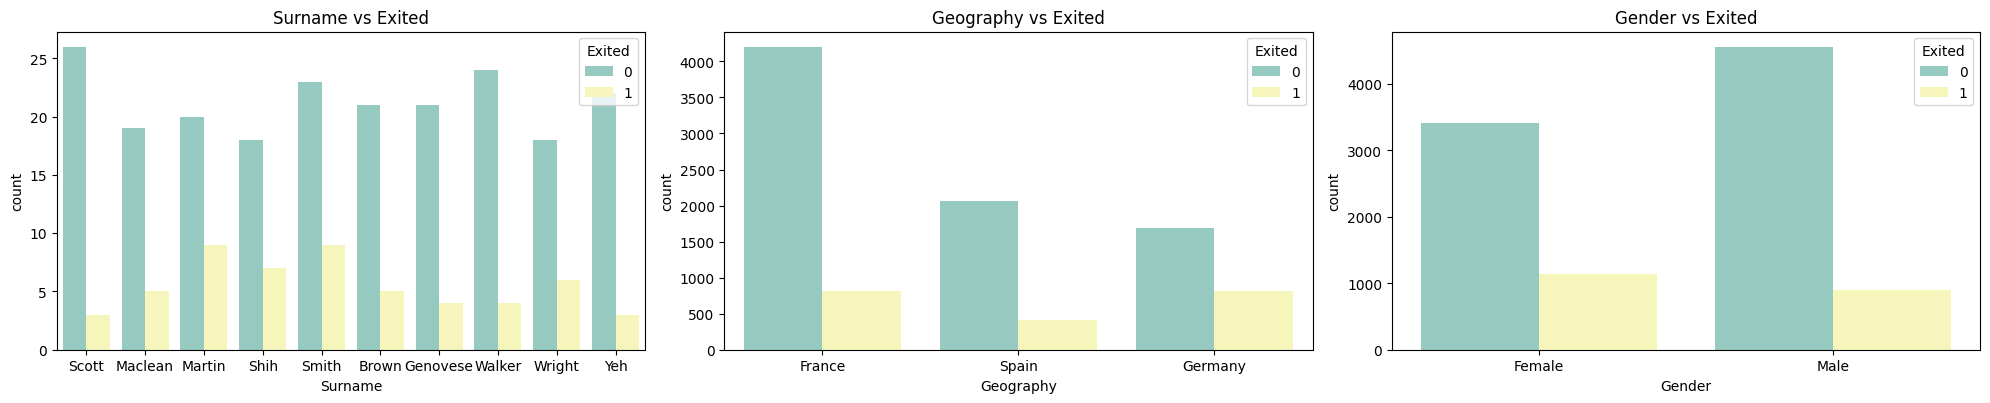

In [6]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(x=col, hue=target, data=df[df[col].isin(top_10_values)])
    plt.title(f'{col} vs {target}')
    plt.legend(title=target)
plt.tight_layout()
plt.show()

Multivariate Analysis

Pairplot for numerical columns

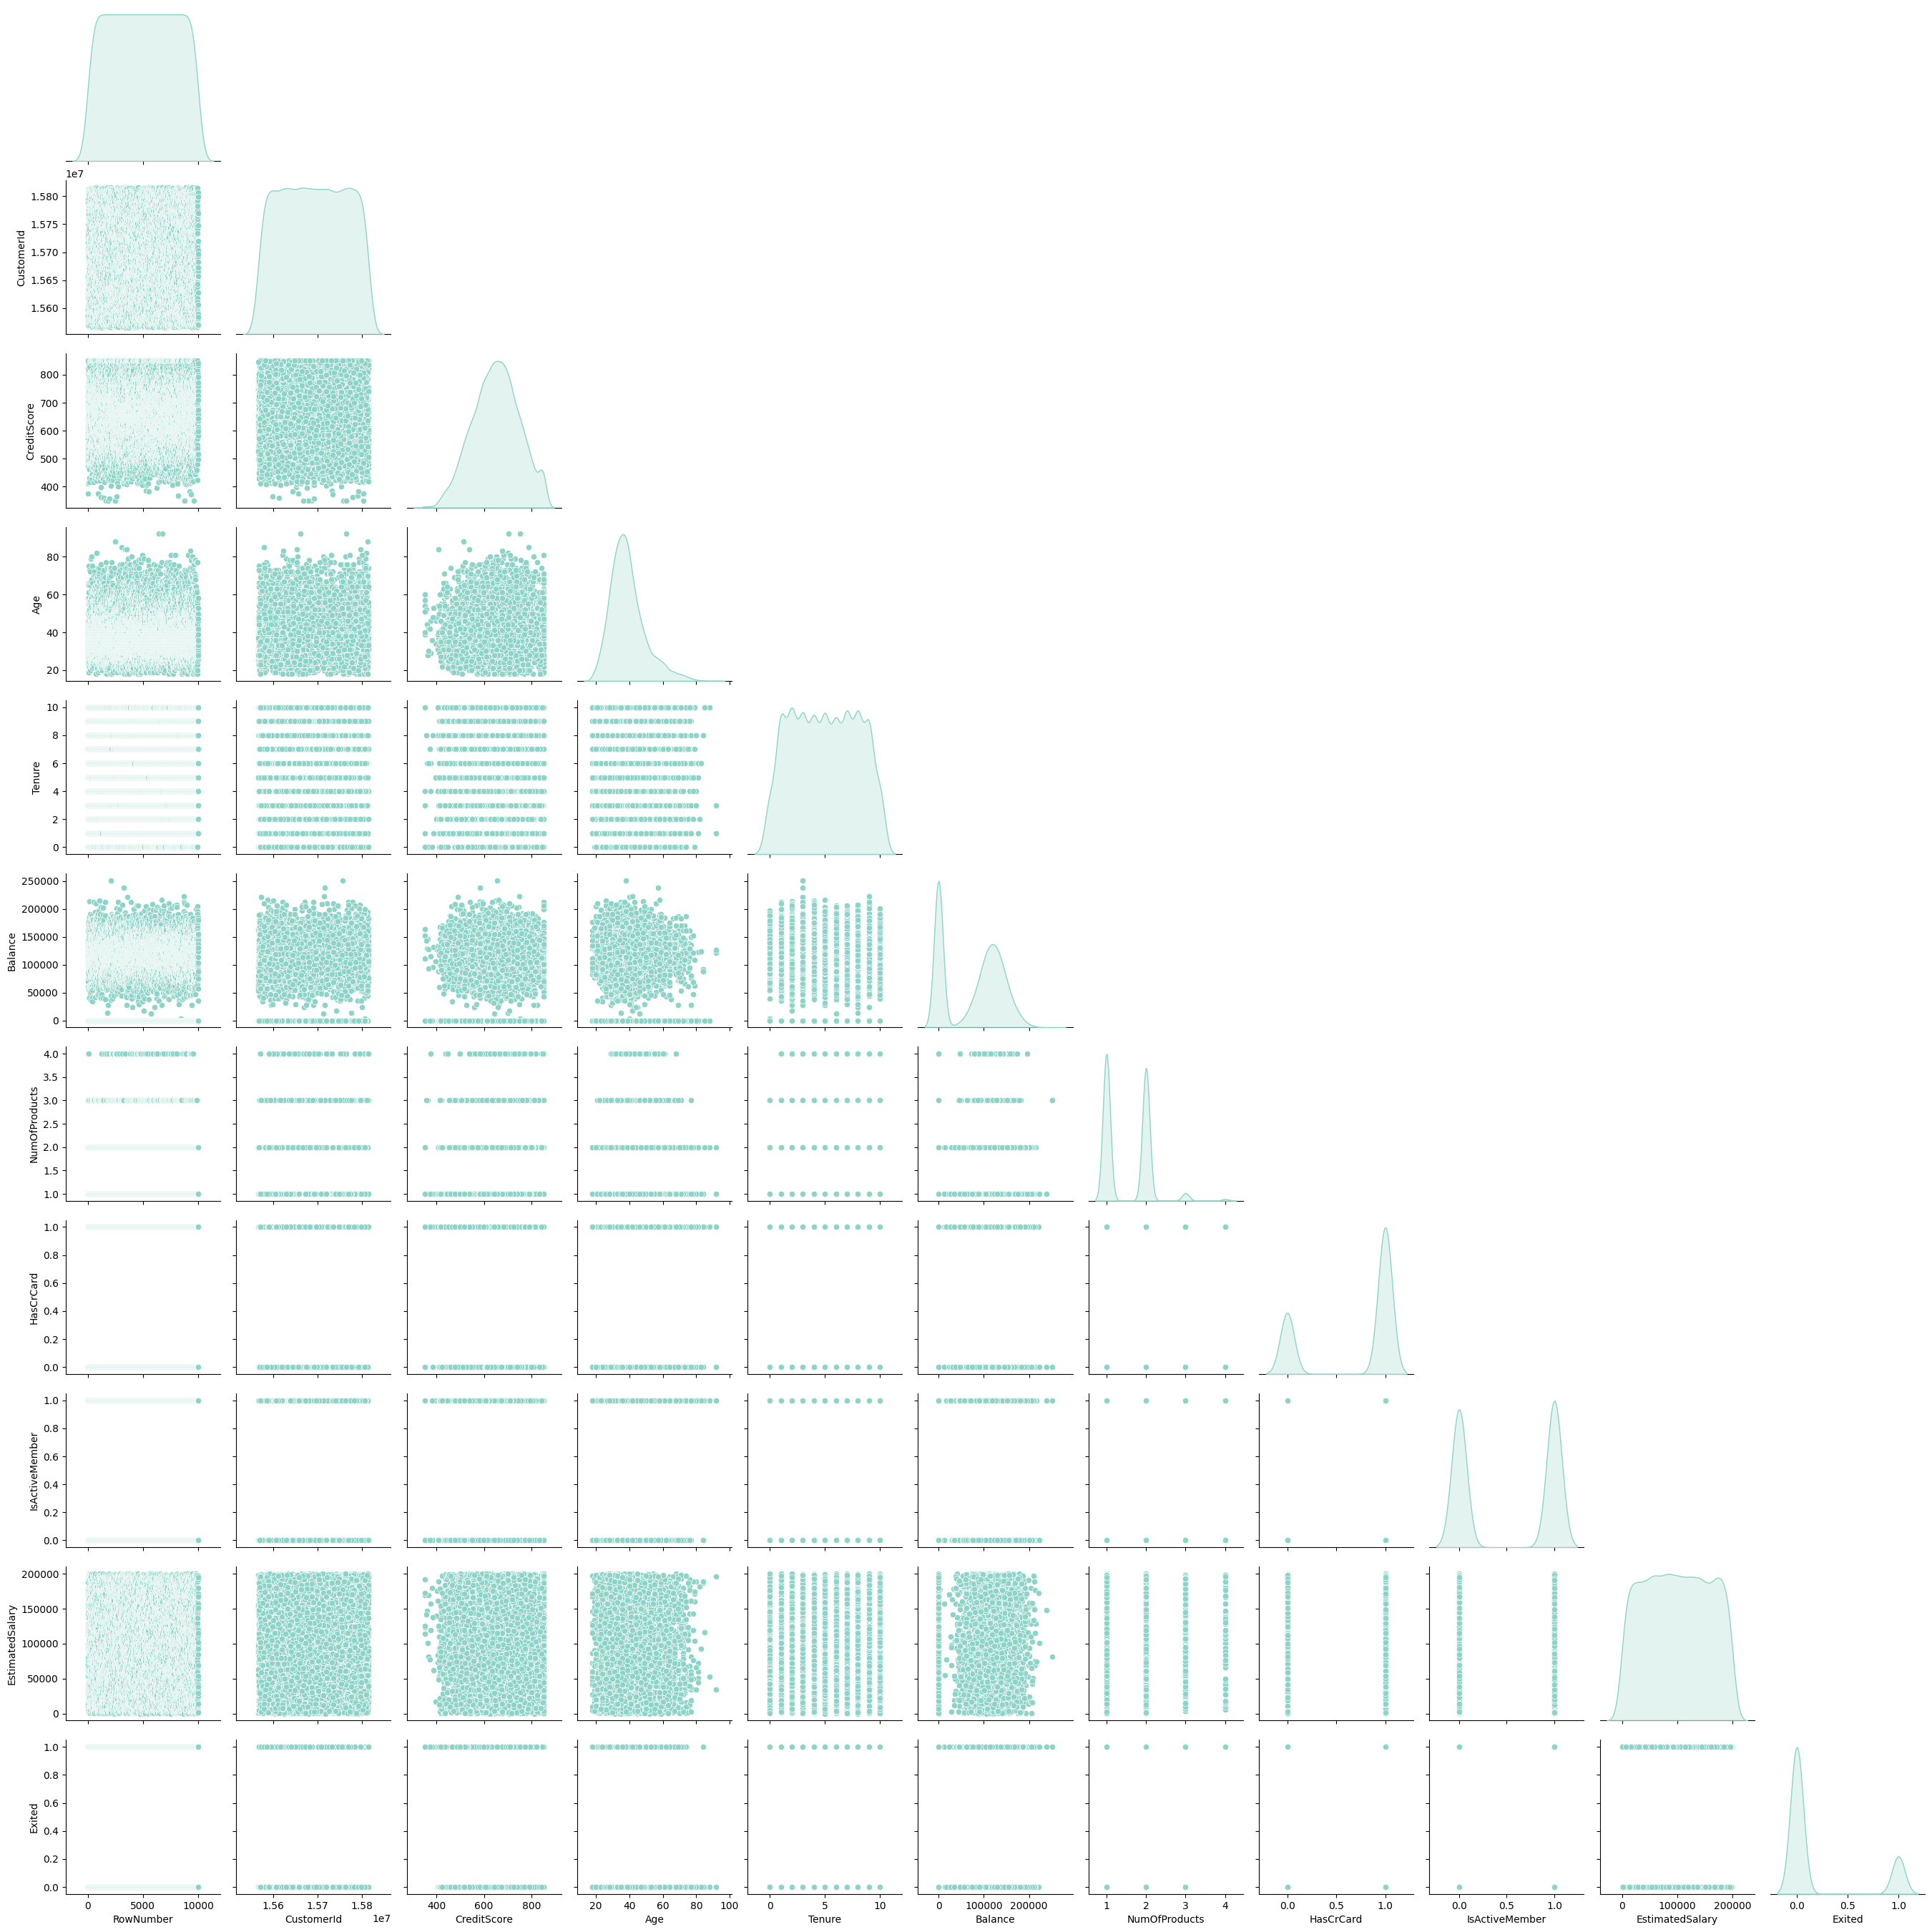

In [7]:
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
plt.show()

Scatter plots for some combinations of numerical variables

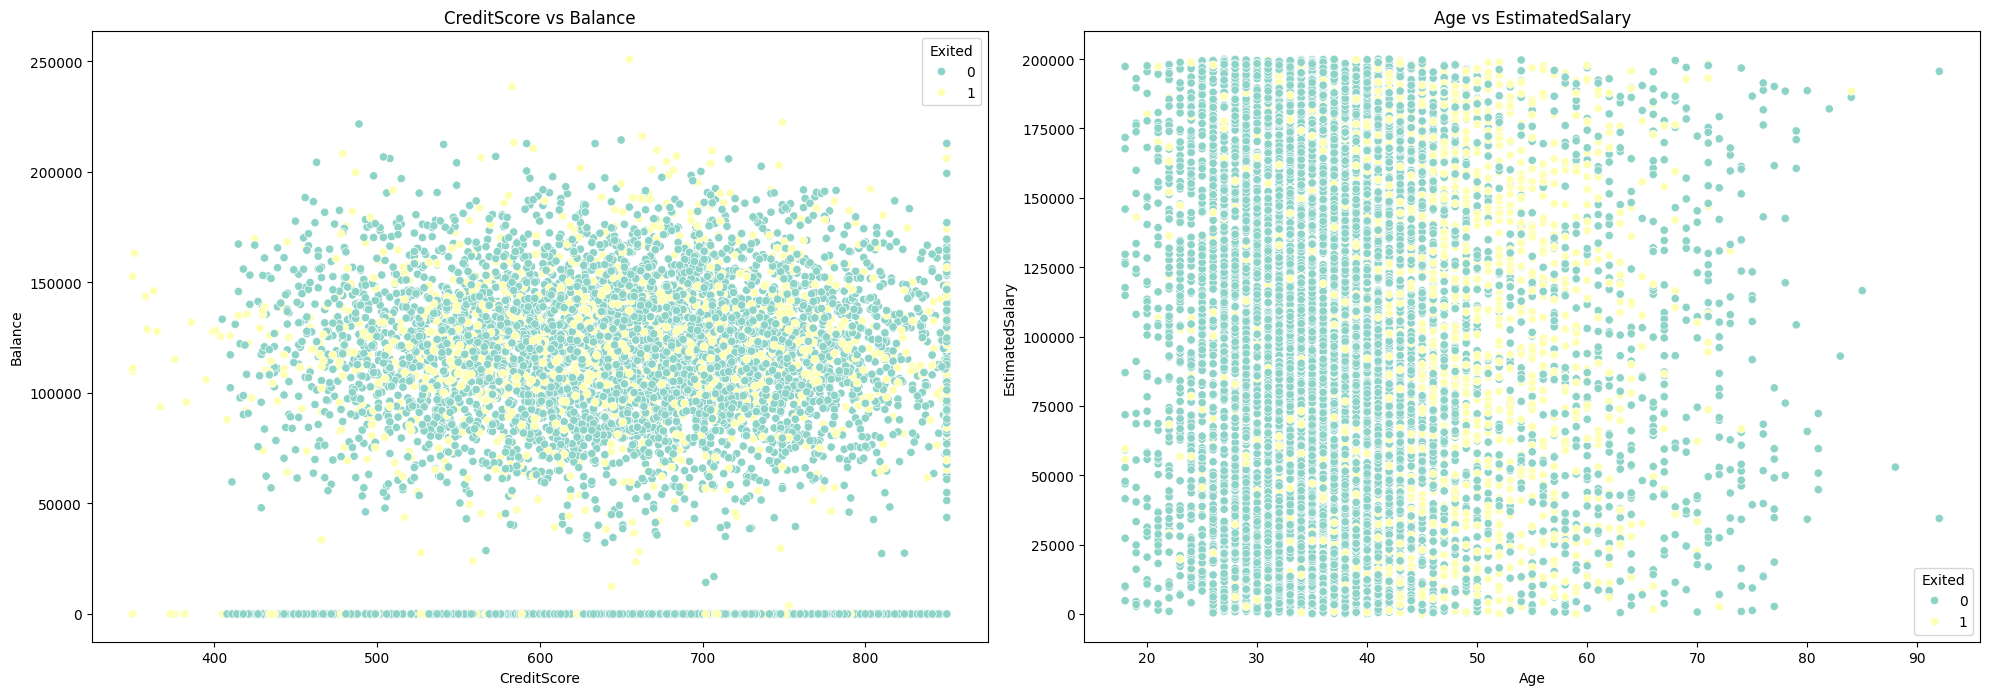

In [8]:
plt.figure(figsize=(20, 20))
pairs = [('CreditScore', 'Balance'), ('Age', 'EstimatedSalary')]
for i, (col1, col2) in enumerate(pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=col1, y=col2, hue=target, data=df)
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()

Correlation Insights

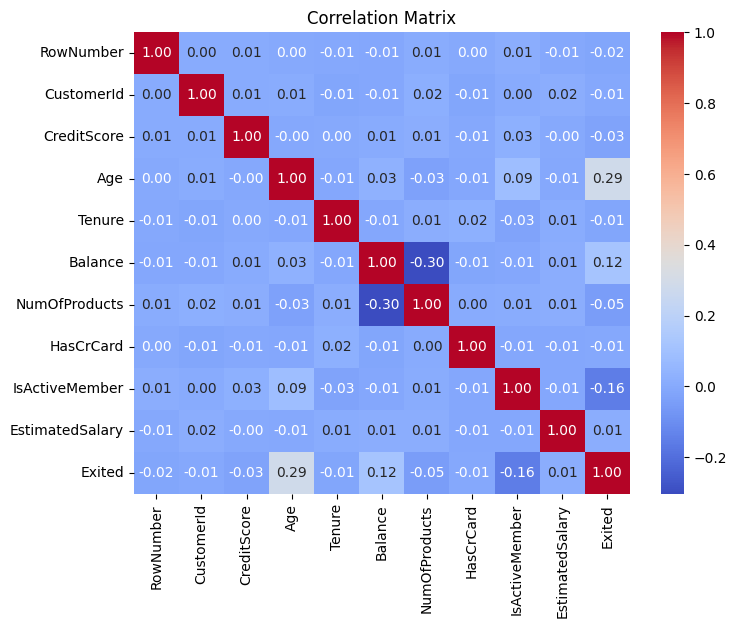

In [9]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Observations

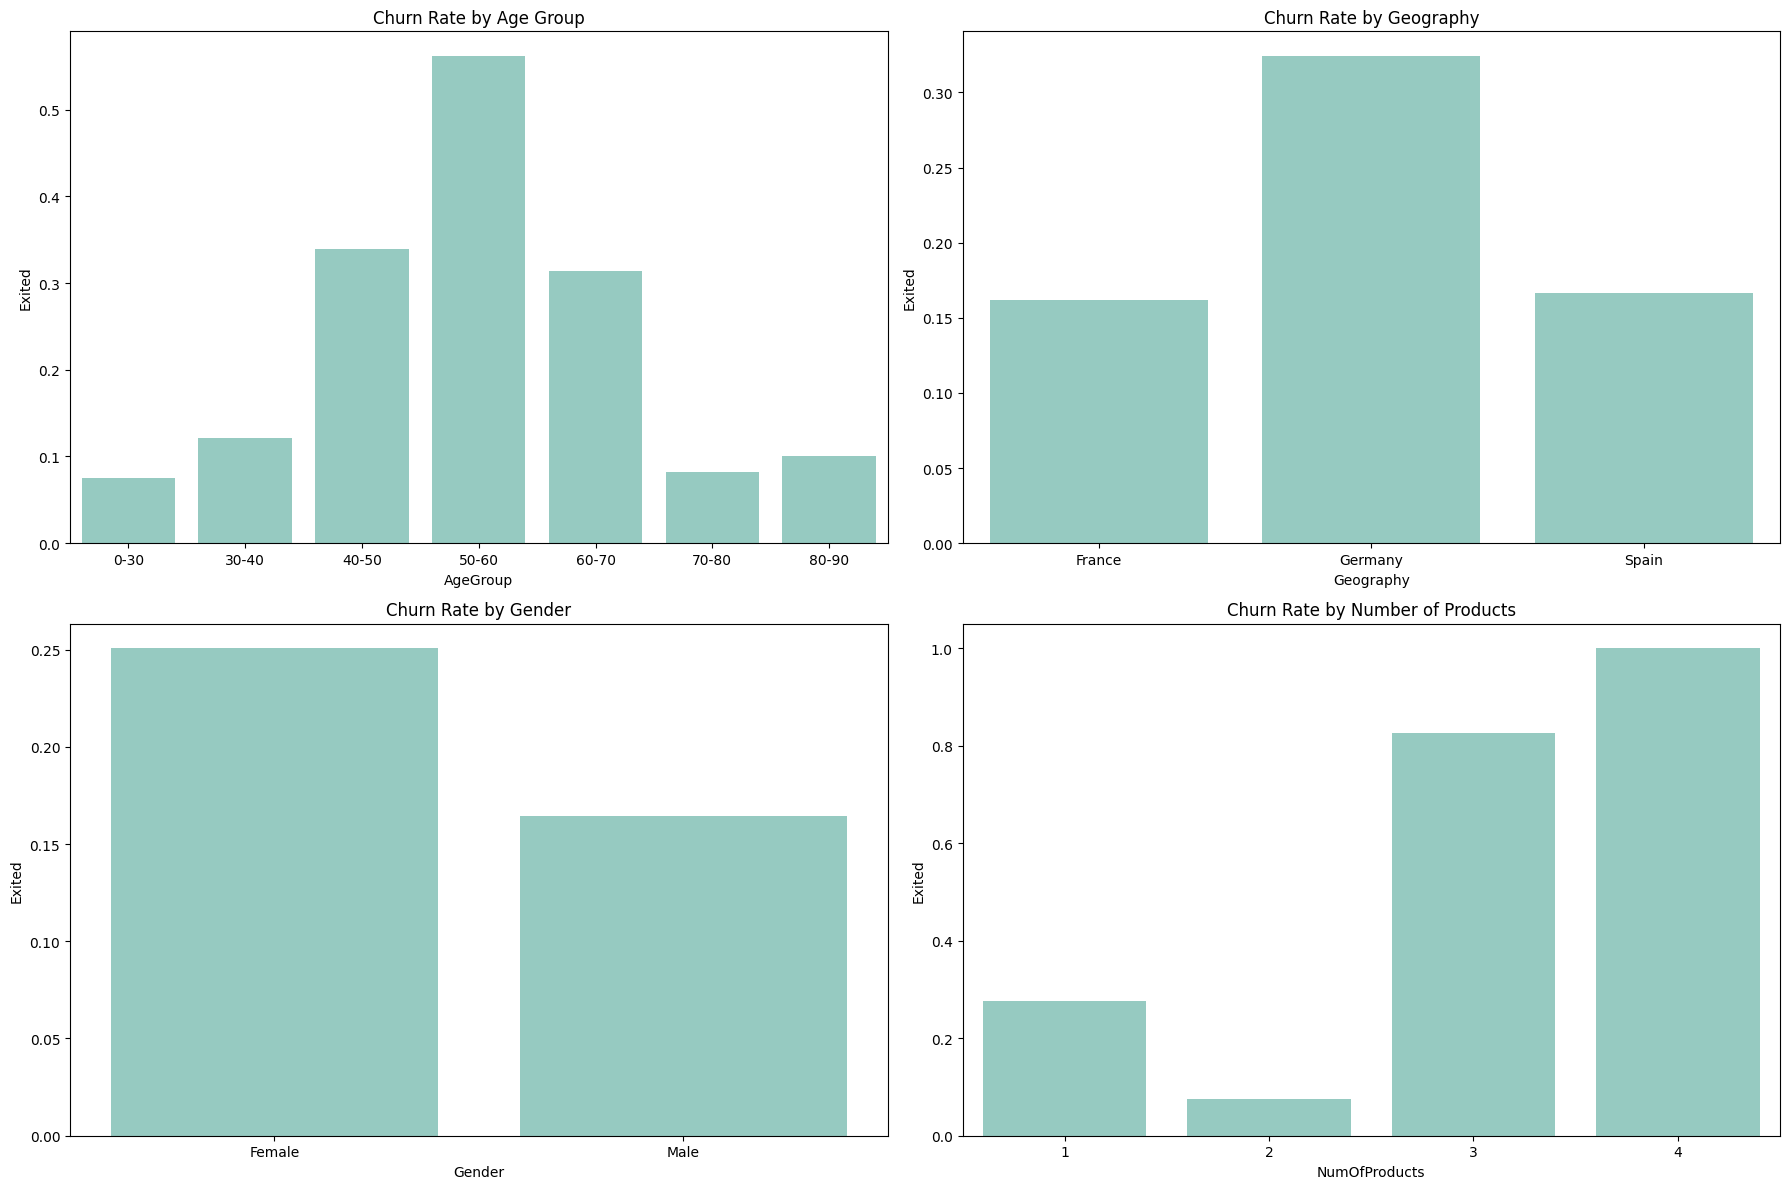

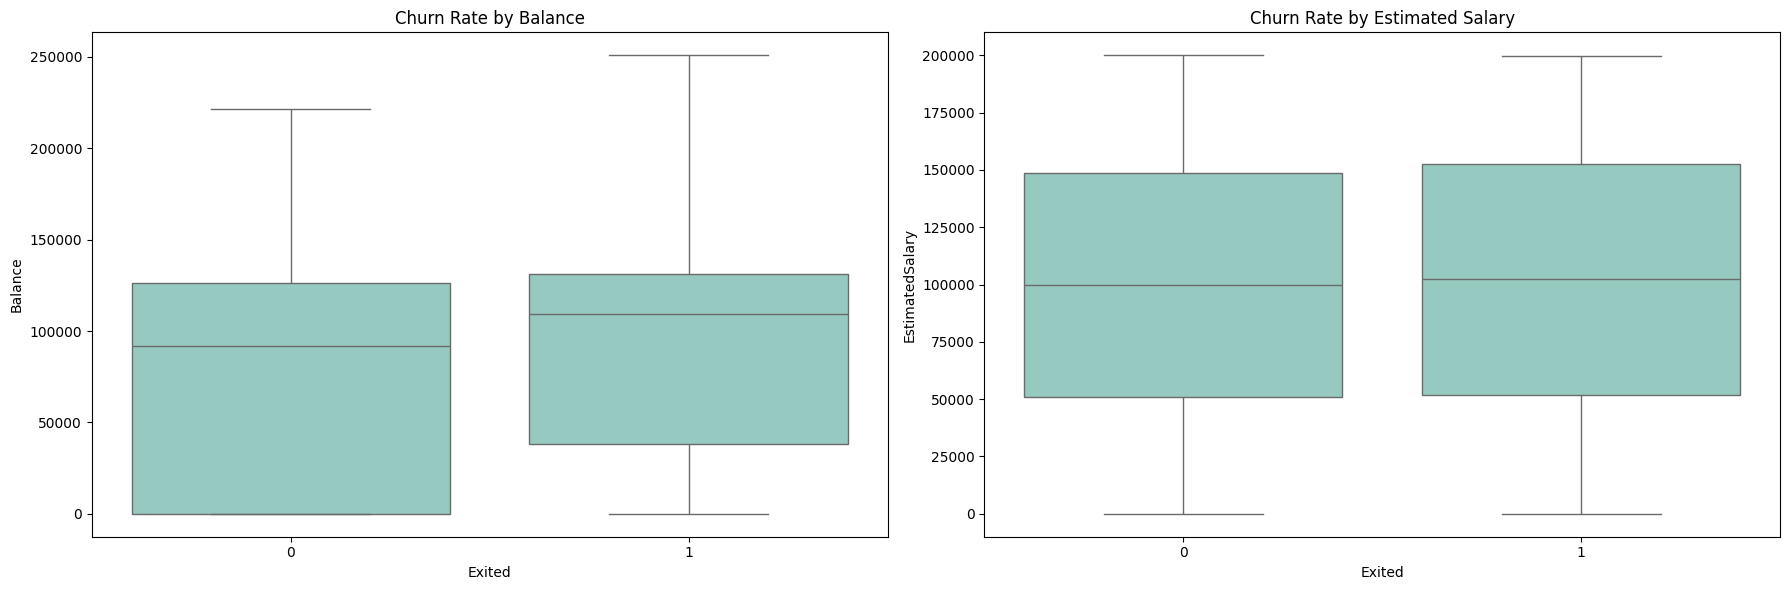

In [10]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

churn_by_age_group = df.groupby('AgeGroup', observed=True)['Exited'].mean().reset_index()
churn_by_geography = df.groupby('Geography', observed=True)['Exited'].mean().reset_index()
churn_by_gender = df.groupby('Gender', observed=True)['Exited'].mean().reset_index()
churn_by_products = df.groupby('NumOfProducts', observed=True)['Exited'].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(data=churn_by_age_group, x='AgeGroup', y='Exited', ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate by Age Group')

sns.barplot(data=churn_by_geography, x='Geography', y='Exited', ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Geography')

sns.barplot(data=churn_by_gender, x='Gender', y='Exited', ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Gender')

sns.barplot(data=churn_by_products, x='NumOfProducts', y='Exited', ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate by Number of Products')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df, x='Exited', y='Balance', ax=axes[0])
axes[0].set_title('Churn Rate by Balance')

sns.boxplot(data=df, x='Exited', y='EstimatedSalary', ax=axes[1])
axes[1].set_title('Churn Rate by Estimated Salary')

plt.tight_layout()
plt.show()